In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

In [43]:
from google.colab import files
uploaded = files.upload()

Saving tc1_SRTF.txt to tc1_SRTF.txt


In [44]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

algorithm_list = ["FCFS", "SJF", "SRTF", "RR", "PRIORITY", "PPRIORITY", "PRR"]
read_file = ["tc1_"+ x + ".txt" for x in algorithm_list]

result_FCFS = pd.read_table(read_file[0], sep = " ")
print(result_FCFS)
result_SJF = pd.read_table(read_file[1], sep = " ")
print(result_SJF)
result_SRTF = pd.read_table(read_file[2], sep = " ")
print(result_SRTF)
result_RR = pd.read_table(read_file[3], sep = " ")
print(result_RR)
result_PRIORITY = pd.read_table(read_file[4], sep = " ")
print(result_PRIORITY)
result_PPRIORITY = pd.read_table(read_file[5], sep = " ")
print(result_PPRIORITY)
result_PRR = pd.read_table(read_file[6], sep = " ")
print(result_PRR)

    S   E PROCESS  Unnamed: 3
0   0   4      P1         NaN
1   4   5      P2         NaN
2   5  10      P0         NaN
3  10  17      P3         NaN
4  17  20      P4         NaN
5  20  22      P5         NaN
    S   E PROCESS  Unnamed: 3
0   0   4      P1         NaN
1   4   5      P2         NaN
2   5   8      P3         NaN
3   8  10      P5         NaN
4  10  15      P0         NaN
5  15  22      P4         NaN
    S   E PROCESS  Unnamed: 3
0   0   1      P1         NaN
1   1   2      P2         NaN
2   2   5      P1         NaN
3   5   8      P3         NaN
4   8  10      P5         NaN
5  10  15      P0         NaN
6  15  22      P4         NaN
     S   E PROCESS  Unnamed: 3
0    0   2      P1         NaN
1    2   3      P2         NaN
2    3   5      P0         NaN
3    5   7      P4         NaN
4    7   9      P3         NaN
5    9  11      P5         NaN
6   11  13      P1         NaN
7   13  15      P0         NaN
8   15  17      P4         NaN
9   17  18      P3         NaN

In [79]:
"""
for i in range (0, len(result_FCFS)):
  print(result_FCFS.loc[i])

result_FCFS["PROCESS"].unique()

nprocess = len(result_FCFS["PROCESS"].unique())
process = pd.DataFrame(result_FCFS["PROCESS"].unique())
#color = list(np.random.choice(range(256), 3))
color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255
color = np.hstack([color, np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)])
color

process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)

processcolor = {x: y for x, y in zip(process, color)}
print(processcolor)
print(result_FCFS.iloc[0]["PROCESS"])
processcolor.get(result_FCFS.iloc[0]["PROCESS"])
processcolor.get(result_FCFS.iloc[0]["PROCESS"]).tolist()
"""
process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())
color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)

processcolor = {x: y for x, y in zip(process, color)}
print(processcolor.get(result_SJF.iloc[0]["PROCESS"]))
print(result_SJF.iloc[0])

[220 253 165]
S               0
E               4
PROCESS        P1
Unnamed: 3    NaN
Name: 0, dtype: object


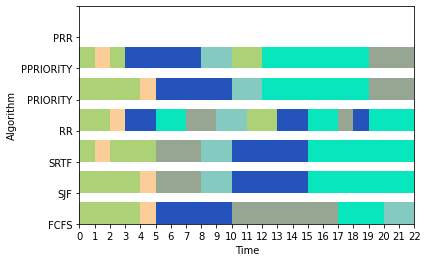

In [60]:
fig, gnt = plt.subplots()
gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)


process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255

processcolor = {x: y for x, y in zip(process, color)}

#gnt.grid(True)
width = 3.5
for i in range (0, len(result_FCFS)):
  #print([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"]), result_FCFS.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"])], (0, width), facecolors = processcolor.get(result_FCFS.iloc[i]["PROCESS"]).tolist())
  #processcolor.get(result_FCFS.iloc[i]["PROCESS"])
  #print(result_FCFS.loc[i])
for i in range (0, len(result_SJF)):
  #print([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"]), result_SJF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"])], (5, width), facecolors = processcolor.get(result_SJF.iloc[i]["PROCESS"]).tolist())
for i in range (0, len(result_SRTF)):
  #print([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"]), result_SRTF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"])], (10, width), facecolors = processcolor.get(result_SRTF.iloc[i]["PROCESS"]).tolist())
for i in range (0, len(result_RR)):
  #print([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"]), result_RR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"])], (15, width), facecolors = processcolor.get(result_RR.iloc[i]["PROCESS"]).tolist())
for i in range (0, len(result_PRIORITY)):
  #print([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"]), result_PRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"])], (20, width), facecolors = processcolor.get(result_PRIORITY.iloc[i]["PROCESS"]).tolist())
for i in range (0, len(result_PPRIORITY)):
  #print([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"]), result_PPRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"])], (25, width), facecolors = processcolor.get(result_PPRIORITY.iloc[i]["PROCESS"]).tolist())
for i in range (0, len(result_PRR)):
  #print([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"]), result_PRR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"])], (30, width), facecolors = processcolor.get(result_PRR.iloc[i]["PROCESS"]).tolist())

plt.savefig("tc1_gantt.png")

In [ ]:
fig, gnt = plt.subplots()
gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)


process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255

processcolor = {x: y for x, y in zip(process, color)}

for i in range (0, result_FCFS.iloc[len(result_FCFS)-1]["E"]):
  
  gnt.broken_barh([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"])], (0, width), facecolors = processcolor.get(result_FCFS.iloc[i]["PROCESS"]).tolist())

In [11]:
"""
import plotly.figure_factory as ff
print(result_FCFS)
result_FCFS.columns = ["Start","Finish","Task"," "]
fig = ff.create_gantt(result_FCFS)
fig.show()
"""

'\nimport plotly.figure_factory as ff\nprint(result_FCFS)\nresult_FCFS.columns = ["Start","Finish","Task"," "]\nfig = ff.create_gantt(result_FCFS)\nfig.show()\n'

TypeError: ignored

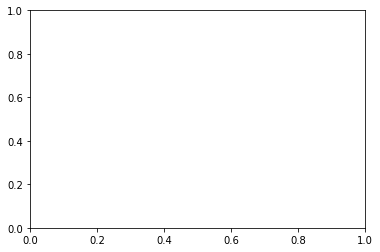

In [63]:
"""
width = 0.9

nrow = len(result_FCFS)


for i in range(nrow):
  plt.broken_barh([result_FCFS["S"][i], result_FCFS["E"][i]], (i-width, width), color = "b")
"""

In [47]:
"""
fig = px.timeline(result_FCFS, x_start="S", x_end="E", y="PROCESS")
fig.show()
"""